In [1]:
from dotenv import find_dotenv, load_dotenv
load_dotenv(find_dotenv())
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import covidecg.data.utils as data_utils
import covidecg.features.utils as features_utils
import biosppy.signals.ecg as ecg

def load_examples(ctrl_all, n=10):
    ctrl_examples = ctrl_all[np.random.choice(ctrl_all.shape[0], n, replace=False)]
    ctrl_examples = data_utils.EcgLeadSelector('MDC_ECG_LEAD_II').fit_transform(ctrl_examples)
    # ctrl_examples = ctrl_examples.squeeze()
    return ctrl_examples

ctrl_all = data_utils.load_stress_ecg_runs('../data/interim/ecg_runs_ctrl.csv', '../data/interim/ecg_runs')[0]

In [2]:
raw_signal = load_examples(ctrl_all, n=1)

(1, 1, 5000)
(1, 1, 5000)
(5000,)


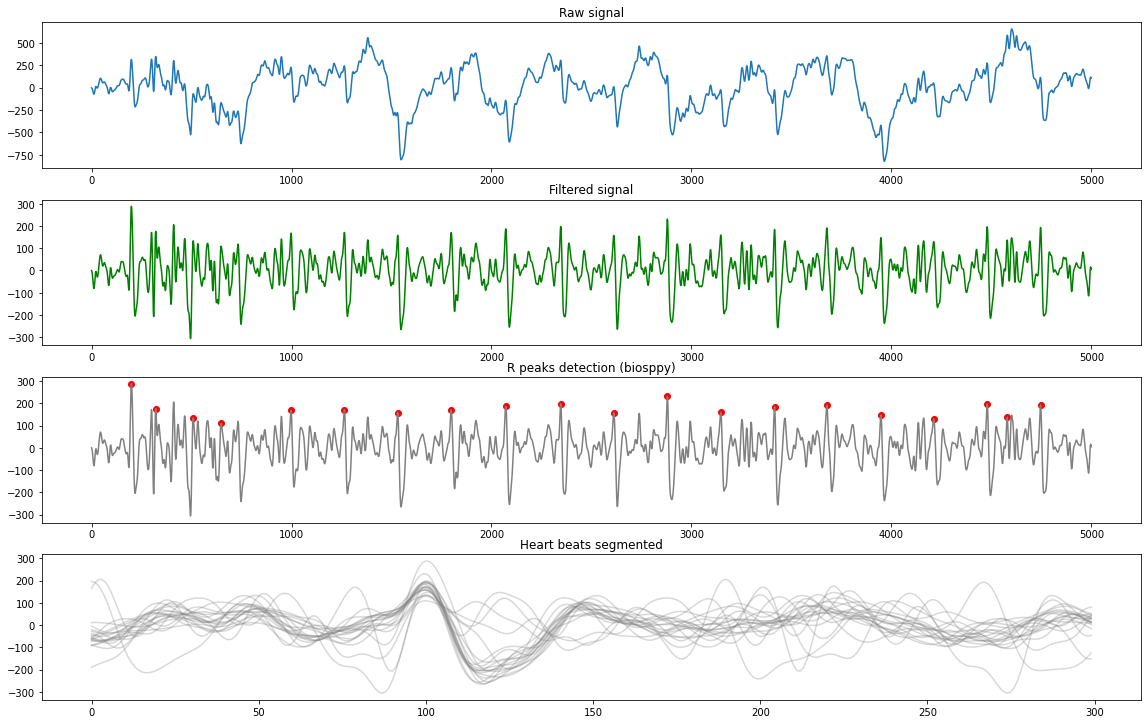

In [5]:
print(raw_signal.shape)
fig, ax = plt.subplots(4, 1, figsize=(16, 10))
plt.tight_layout()

ax[0].title.set_text("Raw signal")
ax[0].plot(raw_signal.squeeze())

# signals = ecg.ecg(raw_signal, sampling_rate=500, show=False)
# filtered_signal = signals['filtered']
filtered_signal = data_utils.EcgSignalCleaner().fit_transform(raw_signal)
print(filtered_signal.shape)

ax[1].title.set_text("Filtered signal")
ax[1].plot(filtered_signal.squeeze(), c='green')

rpeak_locs = features_utils.get_rpeaks_locations(filtered_signal.squeeze(), sampling_rate=500)
ax[2].title.set_text("R peaks detection (biosppy)")
ax[2].plot(filtered_signal.squeeze(), c='gray')
ax[2].scatter(rpeak_locs, filtered_signal.squeeze()[rpeak_locs], c='red')

templates, _ = ecg.extract_heartbeats(
    signal=filtered_signal.squeeze(),
    rpeaks=rpeak_locs,
    sampling_rate=500,
    before=0.2,
    after=0.4,
)
ax[3].title.set_text("Heart beats segmented")
for t in templates:
    ax[3].plot(t, c='gray', alpha=0.3)

plt.show()

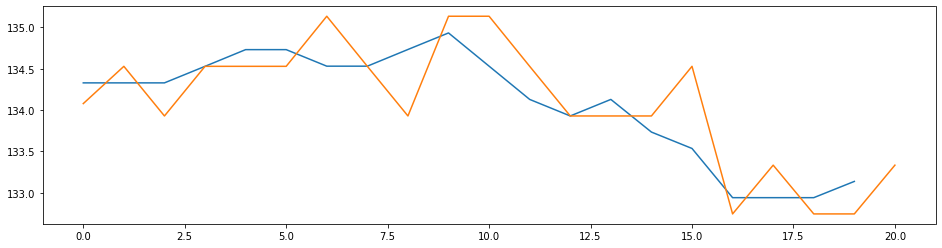

In [127]:
plt.plot(signals['heart_rate'])
plt.plot(nk.ecg_rate(rpeak_locs, sampling_rate=500))

dict_keys(['ECG_P_Peaks', 'ECG_P_Onsets', 'ECG_P_Offsets', 'ECG_Q_Peaks', 'ECG_R_Onsets', 'ECG_R_Offsets', 'ECG_S_Peaks', 'ECG_T_Peaks', 'ECG_T_Onsets', 'ECG_T_Offsets'])

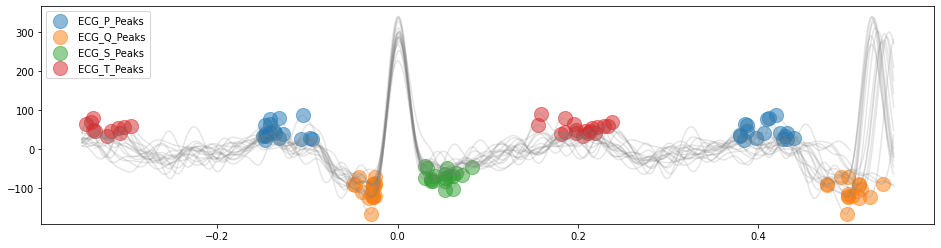

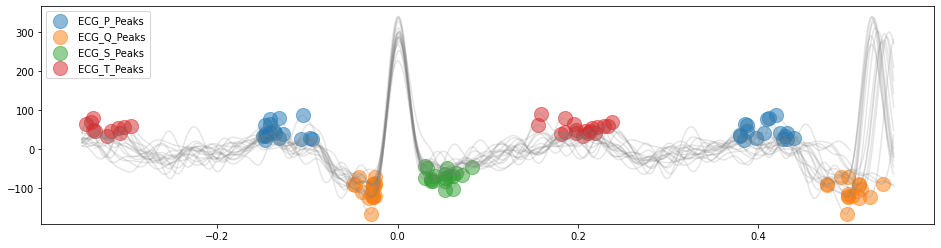

In [124]:
import neurokit2 as nk
plt.rcParams['figure.figsize'] = (16, 4)
waves_info = nk.ecg_delineate(filtered_signal, sampling_rate=500, show=True, method='dwt')[1]
waves_info = nk.ecg_delineate(filtered_signal, rpeaks=rpeak_locs, sampling_rate=500, show=True, method='dwt')[1]
waves_info.keys()

In [82]:
# nk.ecg_plot(nk.ecg_process(filtered_signal, sampling_rate=500)[0], rpeaks=rpeak_locs, sampling_rate=500, show_type="full")
# pass